## Document Structure
1. Headers and Imports
2. Importing Data
3. Data Splitting
4. Modelling
    - 4.1 Model Structure
    - 4.2 Loss, Optimizer, Metric, Validation
    - 4.3 Callbacks
    - 4.4 Model Evaluation (On Train Data)
    - 4.5 Model Prediction
5. Model Evaluation (On Test Data)
6. Saving a model

## 1. Headers and Imports

In [1]:
# Computational Libraries
import tensorflow as tf
import numpy as np
import pandas as pd

# Train Test Split
from sklearn.model_selection import train_test_split

# Keras Modelling Imports
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

# Keras Callbacks
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

%matplotlib inline

## 2. Importing Data

In [2]:
df = pd.read_csv("./Processed_Data/titanic/train.csv")
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


## 3. Data Splitting

In [3]:
labels = df["Survived"]
features = df.drop(columns= ["Survived"])

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(features,labels,test_size = 0.1, random_state = 33)
print(f"Shape of Training Set \n X_Train : {X_train.shape}\n Y_Train : {Y_train.shape}")
print(f"Shape of Evaluation Set \n X_Train : {X_test.shape}\n Y_Train : {Y_test.shape}")

Shape of Training Set 
 X_Train : (800, 10)
 Y_Train : (800,)
Shape of Evaluation Set 
 X_Train : (89, 10)
 Y_Train : (89,)


## 4. Modelling


### 4.1 Model Structure

In [5]:
# Defining Model Structure
model = Sequential()
model.add(Dense(100,input_shape = (10,),kernel_initializer=  "uniform" ,activation="relu"))
model.add(Dense(100,kernel_initializer=  "uniform" ,activation="relu"))
model.add(Dense(100,kernel_initializer=  "uniform" ,activation="relu"))
model.add(Dense(100,kernel_initializer=  "uniform" ,activation="relu"))
model.add(Dense(100,kernel_initializer=  "uniform" ,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41,601
T

2022-11-27 15:16:57.153964: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-27 15:16:57.154086: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 4.2 Loss, Optimizer, Metric, Validation

In [6]:
# Defining Loss, Optimizer, Metric, Validation
model.compile(loss = 'binary_crossentropy',
              optimizer= keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy'])

### 4.3 Callbacks

In [7]:
# Callbacks
# lr_schedule = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
acc_check  = ModelCheckpoint(filepath = "./Saved_Models/keras/acc_{accuracy:.2f} - loss_{loss:.2f}.h5",
                            monitor = "accuracy",
                            save_best_only= True,
                            mode = "max")
early_stop = EarlyStopping(monitor = "loss", patience = 10)

callbacks = [acc_check, early_stop]

In [8]:
history = model.fit(X_train,
                    Y_train,
                    batch_size = 32,
                    epochs = 100,
                    callbacks = [callbacks], verbose = 1)

Epoch 1/100


2022-11-27 15:16:57.320160: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/25 [>.............................] - ETA: 9s - loss: 0.6931 - accuracy: 0.4375

2022-11-27 15:16:57.533891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 8ms/step - loss: 0.6916 - accuracy: 0.6500
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6876 - accuracy: 0.6550
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6789 - accuracy: 0.6600
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6598 - accuracy: 0.6625
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6323 - accuracy: 0.6737
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6135 - accuracy: 0.6750
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6082 - accuracy: 0.6850
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6026 - accuracy: 0.6812
Epoch 9/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6006 - accuracy: 0.6875
Epoch 10/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5966 - accuracy: 0.6900
Epoch 11/100
25/25 [=

25/25 [==============================] - 0s 6ms/step - loss: 0.4280 - accuracy: 0.8100
Epoch 84/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4210 - accuracy: 0.8175
Epoch 85/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4178 - accuracy: 0.8175
Epoch 86/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4167 - accuracy: 0.8200
Epoch 87/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4129 - accuracy: 0.8150
Epoch 88/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4183 - accuracy: 0.8162
Epoch 89/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4165 - accuracy: 0.8112
Epoch 90/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4183 - accuracy: 0.8150
Epoch 91/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4168 - accuracy: 0.8087
Epoch 92/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4149 - accuracy: 0.8125
Epoch 93/100


### 4.4 Model Evaluation (On Train Data)

<AxesSubplot:>

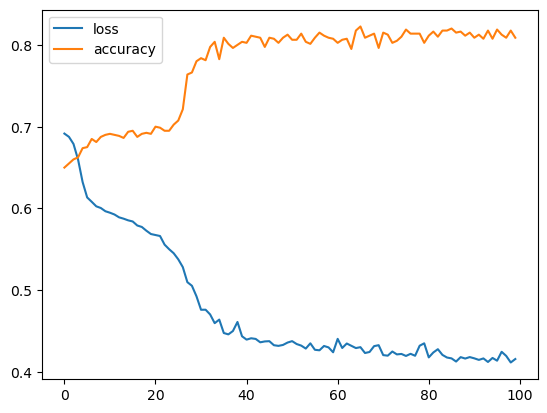

In [9]:
pd.DataFrame(history.history).plot()

In [10]:
model.evaluate(X_train,Y_train)
Y_train_pred = model.predict(X_train)>=0.5

25/25 [==============================] - 0s 4ms/step - loss: 0.4176 - accuracy: 0.8200


2022-11-27 15:17:14.759096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 2ms/step


2022-11-27 15:17:14.970846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [11]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       491
           1       0.81      0.70      0.75       309

    accuracy                           0.82       800
   macro avg       0.82      0.80      0.80       800
weighted avg       0.82      0.82      0.82       800



### 4.5 Model Prediction

In [12]:
Y_test_pred = model.predict(X_test)>=0.5

3/3 [==============================] - 0s 11ms/step


2022-11-27 15:17:15.110583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


## 5. Model Evaluation (On Test Data)

In [13]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        58
           1       0.88      0.71      0.79        31

    accuracy                           0.87        89
   macro avg       0.87      0.83      0.84        89
weighted avg       0.87      0.87      0.86        89



In [14]:
confusion_matrix(Y_test,Y_test_pred)

array([[55,  3],
       [ 9, 22]])

## 6. Saving a model

`model.save_weights()`: Will only save the weights so if you need, you are able to apply them on a different architecture
<br/>
`mode.save()`: Will save the architecture of the model + the the weights + the training configuration + the state of the optimizer

In [15]:
model.save("Best_Models/keras.h5")
model.save_weights("Best_Models/keras_weights.h5")